C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is tr

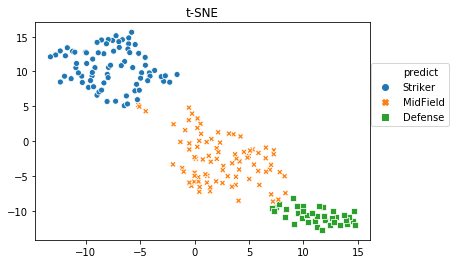

In [7]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

players = pd.read_csv("player_data.csv")

feature = players[["speed", "shoot", "pass", "dribble", "defense", "physical"]]
name = players["name"]

model = KMeans(n_clusters=3)
model.fit(feature)
result_kmeans = model.predict(feature)

predict = pd.DataFrame(result_kmeans)
predict.columns = ['predict']

r = pd.concat([feature, predict], axis=1)
for idx, i in enumerate(r['predict']):
   if i == 0:
       r['predict'][idx] = "Striker"
   elif i == 1:
       r['predict'][idx] = "MidField"
   elif i == 2 :
       r['predict'][idx] = "Defense"
feature_df = pd.DataFrame(feature)

transformed = TSNE(n_components=2).fit_transform(feature_df)
transformed.shape

xs = transformed[:,0]
ys = transformed[:,1]
g = sns.scatterplot(x=xs, y=ys, hue = 'predict', style = 'predict', data=r)
# plt.scatter(xs,ys, c=r['predict'])  #라벨은 색상으로 분류됨
plt.title("t-SNE")
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()